In [46]:
import gdown

file_id = "1GR3IwbvKNuiVXN5E5eMGyEQtT4pP7kCt"
url = f"https://drive.google.com/uc?id={file_id}"
output = 'Twitter_Data.csv'  # Đặt tên file bạn muốn lưu trên máy local

gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1GR3IwbvKNuiVXN5E5eMGyEQtT4pP7kCt
To: d:\Asus\AIO\AIO-Exercise\module5\week2\Twitter_Data.csv
100%|██████████| 20.9M/20.9M [00:02<00:00, 8.80MB/s]


'Twitter_Data.csv'

In [47]:
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [48]:
dataset_path = 'Twitter_Data.csv'
df = pd.read_csv(
    dataset_path
)
df

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


In [50]:
df = df.dropna(axis=0)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162969 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162969 non-null  object 
 1   category    162969 non-null  float64
dtypes: float64(1), object(1)
memory usage: 3.7+ MB


In [52]:
def text_normalize(text : str):
    #Lower
    text = text.lower()

    # Retweet old acronym "RT" removal
    text = re.sub(r'^rt[\s]+', '', text)

    # Hyperlinks removal
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)

    # Remove emoji ký tự kh xác định (vì nó lọc được những từ kh thuộc ASCII)
    text = re.sub(r'[^\x00-\x7F]+', '', text)

    # Punctuation removal
    text = re.sub(r'[^\w\s]', '', text)  

    vocab_lst = text.split()
    stop_words = set(stopwords.words('english'))

    words = [vocab for vocab in vocab_lst if vocab not in stop_words]

    stemmer = SnowballStemmer("english")
    stemmed_words = [stemmer.stem(word) for word in words]

    return ' '.join(stemmed_words)

In [53]:
stop_words = set(stopwords.words('english'))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [54]:
df['clean_text'].apply(text_normalize)

0         modi promis minimum govern maximum govern expe...
1                      talk nonsens continu drama vote modi
2         say vote modi welcom bjp told rahul main campa...
3         ask support prefix chowkidar name modi great s...
4         answer among power world leader today trump pu...
                                ...                        
162975    456 crore paid neerav modi recov congress lead...
162976    dear rss terrorist payal gawar modi kill 1000 ...
162977                            cover interact forum left
162978    big project came india modi dream project happ...
162979    ever listen like gurukul disciplin maintain ev...
Name: clean_text, Length: 162969, dtype: object

In [55]:
vectorizer = TfidfVectorizer(max_features=2000)
x = vectorizer.fit_transform(df['clean_text']).toarray()

In [56]:
y = df['category'].astype(int)

### Add bias

In [57]:
x_b = np.hstack([np.ones((len(x), 1)), x])
x_b

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

### 4. One-hot encoding label

In [58]:
unique_values = y.unique()
print(unique_values)

[-1  0  1]


In [59]:
def one_hot_encoding(y,k):
    one_hot = np.zeros((len(y),k))
    one_hot[np.arange(len(y)), y] = 1
    return one_hot


y = one_hot_encoding(y + 1, len(unique_values))

In [60]:
y

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

### Train_test_split

In [61]:
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffle = True

X_train, X_val, y_train, y_val = train_test_split(
    x_b, y,
    test_size=val_size,
    random_state=random_state,
    shuffle=is_shuffle
)

X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train,
    test_size=test_size,
    random_state=random_state,
    shuffle=is_shuffle
)

In [62]:
print(f'Number of training samples: {X_train.shape[0]}')
print(f'Number of val samples: {X_val.shape[0]}')
print(f'Number of test samples: {X_test.shape[0]}')

Number of training samples: 114078
Number of val samples: 32594
Number of test samples: 16297


In [63]:
def softmax(z):
    return np.exp(z) / np.sum(np.exp(z), axis=1, keepdims=True)

In [64]:
def predict(x, theta):
    z = np.dot(x, theta)
    z = softmax(z)
    return z

In [65]:
def compute_loss(y_hat, y):
    n = y.size
    return -np.log(np.sum((y_hat * y), axis=1)) / n

In [66]:
def compute_gradient(y_hat, y, x):
    n = y.size

    return np.dot(x.T, (y_hat - y)) / n

In [67]:
def update_theta(theta, gradient, lr):
    new_theta = theta - lr * gradient
    return new_theta

In [68]:
def compute_accuracy(x, y, theta):
    y_hat = predict(x, theta)
    label_hat = np.argmax(y_hat, axis=1)
    labe_true = np.argmax(y, axis=1)
    acc = (label_hat == labe_true).mean()
    return round(acc, 3)

In [69]:
lr = 0.1
epochs = 200
batch_size = X_train.shape[0]
n_features = X_train.shape[1]

np.random.seed(random_state)
theta = np.random.uniform(
    size=(n_features, len(unique_values))
)

In [70]:
train_accs = []
train_losses = []
val_accs = []
val_losses = []

for epoch in range(epochs):
    accuracy_batch_val = []
    accuracy_batch_train = []
    loss_batch_val = []
    loss_batch_train = []

    for i in range(0, len(X_train), batch_size):
        x = X_train[i:i + batch_size]
        y = y_train[i:i + batch_size]
        # compute z, y_hat
        y_hat = predict(x, theta)

        # compute gradient
        gradient = compute_gradient(y_hat, y, x)

        # update weight
        theta = update_theta(theta, gradient, lr)

        # evaluation train
        loss = compute_loss(y_hat, y)
        loss_batch_train.append(np.sum(loss))
        accuracy_batch_train.append(compute_accuracy(x, y, theta))

        # evaluation validation
        y_hat_val = predict(X_val, theta)
        loss_val = compute_loss(y_hat_val, y_val)
        loss_batch_val.append(np.sum(loss_val))
        accuracy_batch_val.append(compute_accuracy(X_val, y_val, theta))

    train_batch_loss = sum(loss_batch_train) / len(loss_batch_train)
    val_batch_loss = sum(loss_batch_val) / len(loss_batch_val)
    train_batch_acc = sum(accuracy_batch_train) / len(accuracy_batch_train)
    val_batch_acc = sum(accuracy_batch_val) / len(accuracy_batch_val)

    train_losses.append(train_batch_loss)
    val_losses.append(val_batch_loss)
    train_accs.append(train_batch_acc)
    val_accs.append(val_batch_acc)

    if epoch >= 20:
        print(
            f"\nEPOCH {epoch + 1}:\tTraining loss: {train_batch_loss:.3f}\tValidation loss: {val_batch_loss:.3f}")


EPOCH 21:	Training loss: 0.372	Validation loss: 0.371

EPOCH 22:	Training loss: 0.371	Validation loss: 0.370

EPOCH 23:	Training loss: 0.371	Validation loss: 0.370

EPOCH 24:	Training loss: 0.371	Validation loss: 0.370

EPOCH 25:	Training loss: 0.371	Validation loss: 0.370

EPOCH 26:	Training loss: 0.370	Validation loss: 0.370

EPOCH 27:	Training loss: 0.370	Validation loss: 0.369

EPOCH 28:	Training loss: 0.370	Validation loss: 0.369

EPOCH 29:	Training loss: 0.370	Validation loss: 0.369

EPOCH 30:	Training loss: 0.370	Validation loss: 0.369

EPOCH 31:	Training loss: 0.369	Validation loss: 0.369

EPOCH 32:	Training loss: 0.369	Validation loss: 0.368

EPOCH 33:	Training loss: 0.369	Validation loss: 0.368

EPOCH 34:	Training loss: 0.369	Validation loss: 0.368

EPOCH 35:	Training loss: 0.369	Validation loss: 0.368

EPOCH 36:	Training loss: 0.369	Validation loss: 0.368

EPOCH 37:	Training loss: 0.368	Validation loss: 0.367

EPOCH 38:	Training loss: 0.368	Validation loss: 0.367

EPOCH 39:

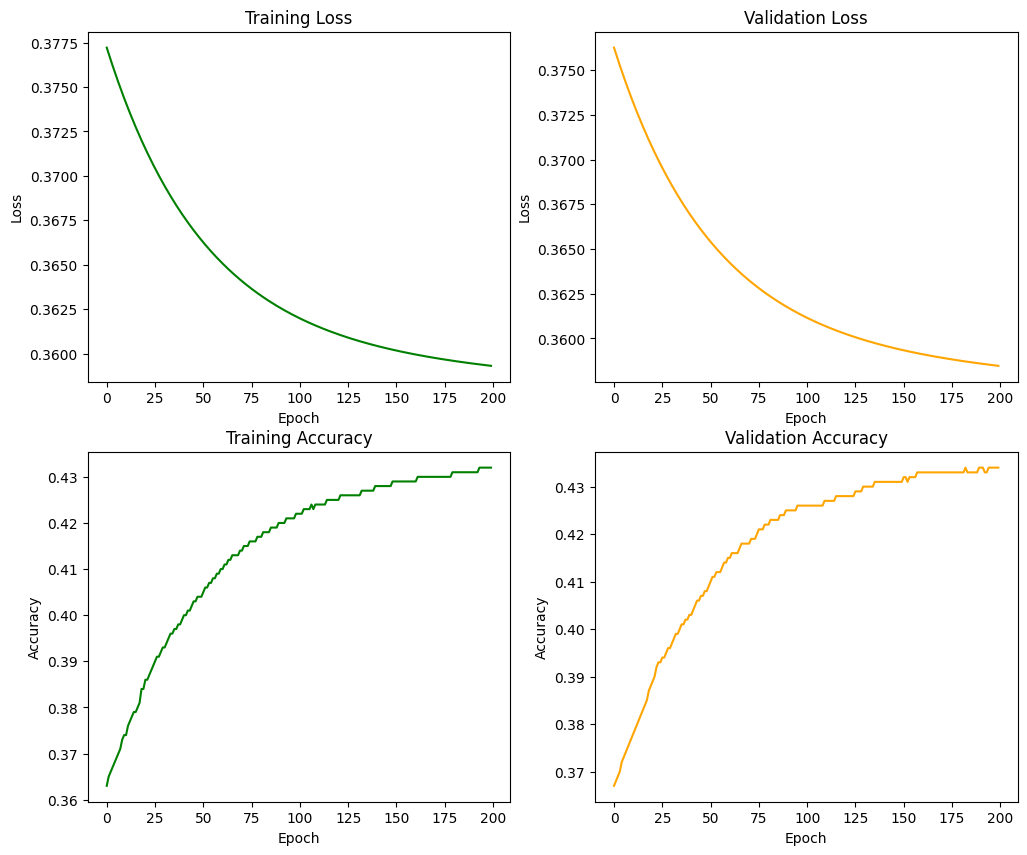

In [71]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
ax[0, 0].plot(train_losses, color='green')
ax[0, 0].set(xlabel='Epoch', ylabel='Loss')
ax[0, 0].set_title('Training Loss')

ax[0, 1].plot(val_losses, color='orange')
ax[0, 1].set(xlabel='Epoch', ylabel='Loss')
ax[0, 1].set_title('Validation Loss')

ax[1, 0].plot(train_accs, color='green')
ax[1, 0].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 0].set_title('Training Accuracy')

ax[1, 1].plot(val_accs, color='orange')
ax[1, 1].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 1].set_title('Validation Accuracy')

plt.show()

In [72]:
# Val set
val_set_acc = compute_accuracy(X_val, y_val, theta)
print('Evaluation on validation set:')
print(f'Accuracy: {val_set_acc}')

Evaluation on validation set:
Accuracy: 0.434


In [73]:
# Test set
test_set_acc = compute_accuracy(X_test, y_test, theta)
print('Evaluation on test set:')
print(f'Accuracy: {test_set_acc}')

Evaluation on test set:
Accuracy: 0.432
